### COM361 &mdash; Introdução a Otimização &mdash; 2022, Prof. Amit ###

# 2. Estratégia de controle ótimo para diminuir espalhamento de fake news em mídia social [Capítulo 15 de ref. 1]						 #

#### Julia Vaisburd Xexéo  (julia.xexeo@poli.ufrj.br), Ney Rafael Guindane da Silva Barbosa (ney.barbosa@poli.ufrj.br)

*****

### Índice

1. [Introdução](#1.-Introdução)
1. [Modelo Matemático](#2.-Modelo Mathemático)
1. [Solução](#3.-Solução)
1. [Resultados e Discussão](#4.-Resultados-e-discussão)
  1. [Subseção Opcional](#4.A.-Acrescente-subseções-se-necessário)
1. [Conclusão](#5.-Conclusão)

## 1. Introdução ##

Nos últimos anos, com o advento das redes sociais e sua disseminação, o espalhamento de fake news, notícias falsas, aumentou e foi potencializado pela rapidez desses novos meios de comunicação. Eventos como as eleições americanas em 2016, Brasileiras em 2018 e a epidemia de Covid 19, foram marcados pelo alto número de noticias falsas disseminadas nas redes sociais.

O nosso projeto tem como objetivo buscar o controle ótimo e também um preditivo de um modelo de espalhamento de fake news nas redes sociais, proposto no livro !!COLOCAR CITAÇÃO AQUI!!

No cenário que estamos considerando as noticias falsas são disseminadas não apenas em canais duvidosos, mas também em canais de noticias confiáveis da internet. Além disso, o governo está ciente que isso é uma possível ameaça e irá tomar medidas para converter e prevenir essa epidemia de falsas informações, antes que vire um pânico.

Por sorte, o governo tem acesso a modernas ferramentas de alerta e canais de distribuição direta de noticias, e é importante ressaltar que não importa para o governo se a noticia é realmente falsa ou verdadeira, apenas se ele quer diminuir ou aumentar o espalhamento da mesma. 

Levaremos em consideração que essa epidemia de informação começou antes do governo ficar ciente de seu perigo e assim parte da população já está espalhando as noticias e as recebendo.

O modelo de espalhamento de Fake News se assemelha a um modelo de pandemia, aonde há os infectados, que podem espalhar a doença, então no nosso caso serão chamados de espalhadores, que podem espalhar a notícia. Os não infectados, que no nosso caso serão chamados de ignorantes, que ainda podem se infectar e espalhar a notícia e os curados, que não se contaminam mais e assim não podem espalhar mais a notícia. 

No nosso modelo, não mostramos diretamente os curados, será algo implícito, o gráfico de população só terá espalhadores e ignorantes, então a diferença percentual para chegar a 100\% da população será o número de curados.   

Dessa forma , o objetivo do nosso controle será  impedir que as notícias falsas ganhem uma vida própria substancial dentro das redes sociais.

Assim, primeiramente a partir da perspectiva de controle sera definida a função objetiva e a estratégia de controle ótimo. Após a otimização dessa função, será introduzida restrições orçamentárias ao controle.
Depois, será proposto um modelo de controle em tempo real e estudaremos se os controles calculados são válidos na presença de incertezas.

## 2. Modelo matemático ##


O objetivo da nossa modelagem é previnir de melhor forma o espalhamento de fake news nas redes sociais, levaremos em consideração o conceito de Herd Immunity, no qual



Esta seção deve conter uma discussão das hipóteses de modelagem feitas no problema (conforme a origem do problema: física? economia? redes sociais? ...). Explique a escolha das variáveis de decisão, as restrições e a função objetivo. Finalmente, mostre o problema de otimização escrite em forma padrão. Discute o tipo de modelo adotado (LP, QP, MIP, etc.). Equações devem ser formatadas em $\LaTeX$ dentro do notebook Julia. Nesta seção, pode supor que **o leitor está familiarizado com a matéria"**.

Eis um exemplo de uma equação:


Aqui está um exemplo de um problema de otimização no formato padrão:

$$
\begin{aligned}
\underset{x_1, x_2, u \in \mathbb{R^n}}{\text{minimize}}\qquad& f_0(x) \\
\text{sujeito a:}\qquad& f_i(x) \le 0 && i=1,\dots,m\\
& h_j(x) = 0 && j=1,\dots,r
\end{aligned}
$$

Para algumas dicas rápidas sobre a utilizção de $\LaTeX$, veja [este cheat sheet](http://users.dickinson.edu/~richesod/latex/latexcheatsheet.pdf).

## 3. Solução ##

Nesta seção, coloque seu código em Julia + JuMP e resolva o problema proposto. Seu código deve ser limpo (não macarrônico!), de fácil leitura, bem comentado e anotado e deve compilar sem erros em Julia 1.x, x$\geq 1$! Não valem códigos em outras linguagens. **Vou rodar seu código para avaliar seu projeto**. Sugiro a utilização de múltiplos blocos de códigos separados por blocos de texto (células Markdown) explicando as várias partes da sua solução. Sugiro também a resolução de várias versões do seu problema, com modelos e hipóteses diferentes.

É permitido chamar pacotes externos, mas evite a utilização de bibliotecas exóticas (pois, em geral, não rodam em todas as versões de Julia, e terei que instalar a mesma versão que você usou, ou rodar na plataforma Google Colab, que gostaria de evitar).

In [55]:
#DEFININDO PACOTES A SEREM UTILIZADOS
@time using Clp
@time using JuMP
@time using Plots
@time using Ipopt
@time using LinearAlgebra
@time using ImplicitEquations
@time using Mosek
@time using  MosekTools

  0.000773 seconds (277 allocations: 18.609 KiB)
  0.000819 seconds (277 allocations: 18.609 KiB)
  0.000879 seconds (277 allocations: 18.609 KiB)
  0.001983 seconds (277 allocations: 18.609 KiB)
  0.002088 seconds (605 allocations: 46.422 KiB)
  0.000742 seconds (277 allocations: 18.625 KiB)
  0.000897 seconds (277 allocations: 18.609 KiB)
  0.000824 seconds (277 allocations: 18.609 KiB)


In [57]:
#PARAMETROS

b = 1 #10^(-7) #colocar assim?
β= 0.5
γ = 0.3
k = 50
x_1_init = 0.7
x_2_init = 0.3
T = [ i for i=1:k ];


Cálculo do controle ótimo no Horizonte [$1,k$]

In [58]:

#nomeando o modelo e especificando o solver
m = Model(with_optimizer(Ipopt.Optimizer))


#definindo as variavéis
@variable(m, x_1[1:T[k]]) # ignorantes
@variable(m, x_2[1:T[k]])  #spreaders
@variable(m, u[1:T[k]]) #controle



#restrições
for k in 1:T[k] 
    @constraint(m, x_1[k] >= 0)
    @constraint(m, x_2[k] >= 0)
    @constraint(m, u[k] >= 0)
end

@constraint(m, x_1[1] == x_1_init)
@constraint(m, x_2[1] == x_2_init)

for k in 2:T[k] 
    @constraint(m, x_1[k] + x_2[k] <= (γ / β)) 
end
for k in 1:T[k]-1 
    @NLconstraint(m, x_1[k+1] == x_1[k] - β * x_1[k] * x_2[k] - b * u[k] * x_1[k])
    @NLconstraint(m, x_2[k+1] == x_2[k] + β * x_1[k] * x_2[k] - γ * x_2[k] * x_2[k])
end

@objective(m, Min, sum((x_1[k] + x_2[k] - (β/ γ)).^2)) 

optimize!(m)

uopt = JuMP.value.(u[1:48])
x_1opt = JuMP.value.(x_1[1:48])
x_2opt = JuMP.value.(x_2[1:48])

println("x1 ignorantes:",x_1opt)
println("x_2 spreaders",x_2opt)
println("u",uopt)

#cortar ultimo ponto

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      345
Number of nonzeros in inequality constraint Jacobian.:      248
Number of nonzeros in Lagrangian Hessian.............:      395

Total number of variables............................:      150
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      100
Total number of inequality constraints...............:      199
        inequality constraints with only lower bounds:      150
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       49

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.7777778e+00 7.00e-01 5.00e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

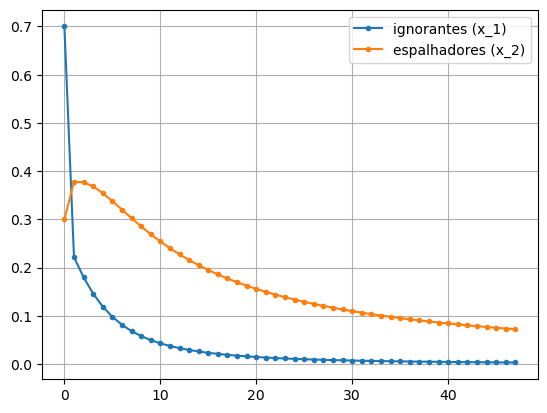

Figure(PyObject <Figure size 640x480 with 0 Axes>)

In [59]:
using PyPlot
PyPlot.svg(true)
PyPlot.plot([x_1opt x_2opt],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)"], loc="best")
PyPlot.grid()
PyPlot.figure()

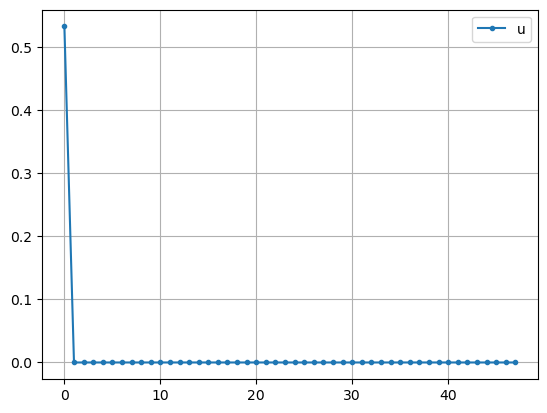

Figure(PyObject <Figure size 640x480 with 0 Axes>)

In [60]:
PyPlot.plot(uopt,".-")
PyPlot.legend("u",loc="best")
PyPlot.grid()
PyPlot.figure()

Otiização colocando valor máximo de custo

In [63]:


#nomeando o modelo e especificando o solver
m = Model(with_optimizer(Ipopt.Optimizer))


#definindo as variavéis
@variable(m, x_1[1:T[k]]) # ignorantes
@variable(m, x_2[1:T[k]])  #spreaders
@variable(m, u[1:T[k]]) #controle



#restrições
for k in 1:T[k]-1 
    @constraint(m, x_1[k] >= 0)
    @constraint(m, x_2[k] >= 0)
    @constraint(m, u[k] >= 0)
end

@constraint(m, x_1[1] == x_1_init)
@constraint(m, x_2[1] == x_2_init)

for k in 2:T[k] 
    @constraint(m, x_1[k] + x_2[k] <= (γ / β)) 
end

for k in 1:T[k]-1 
    @NLconstraint(m, x_1[k+1] == x_1[k] - β * x_1[k] * x_2[k] - b * u[k] * x_1[k])
    @NLconstraint(m, x_2[k+1] == x_2[k] + β * x_1[k] * x_2[k] - γ * x_2[k] * x_2[k])
    @constraint(m, u[k] <= 0.1) 
end

@objective(m, Min, sum((x_1[k] + x_2[k] - (β/ γ)).^2)) 

optimize!(m)

uopt = JuMP.value.(u)
x_1opt = JuMP.value.(x_1)
x_2opt = JuMP.value.(x_2)


println("x1 ignorantes:",x_1opt)
println("x_2 spreaders",x_2opt)
println("u",uopt)



This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      345
Number of nonzeros in inequality constraint Jacobian.:      294
Number of nonzeros in Lagrangian Hessian.............:      395

Total number of variables............................:      150
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      100
Total number of inequality constraints...............:      245
        inequality constraints with only lower bounds:      147
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       98

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.7777778e+00 7.00e-01 4.44e-16  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

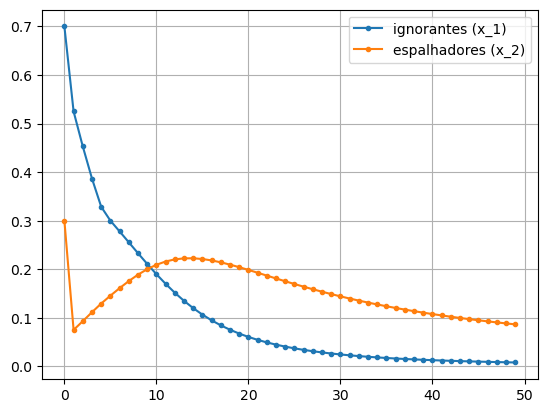

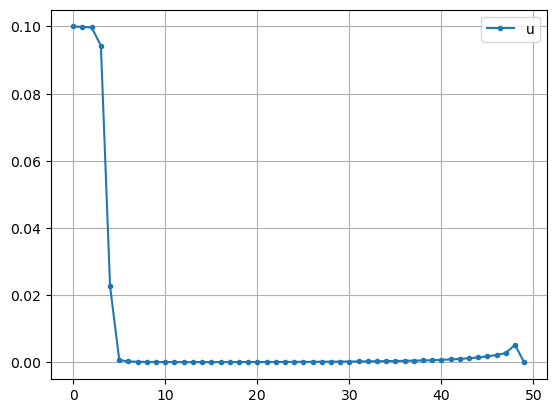

In [64]:
using PyPlot
PyPlot.svg(true)
PyPlot.plot([x_1opt x_2opt],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)"], loc="best")
PyPlot.grid()
PyPlot.figure()
PyPlot.plot(uopt,".-")
PyPlot.legend("u",loc="best")
PyPlot.grid()

Controle Preditivo

In [74]:

x1 = zeros(k)
x2 = zeros(k)
uu = zeros(k-1)

x1[1] = x_1_init
x2[1] = x_2_init

for k in 1:T[20]-1
    #nomeando o modelo e especificando o solver
    m = Model(with_optimizer(Ipopt.Optimizer))

    #definindo as variavéis
    @variable(m, x_1 >= 0) # ignorantes
    @variable(m, x_2 >= 0)  #spreaders
    @variable(m, u >= 0) #controle

    @constraint(m, x_1 + x_2 <= (γ / β)) 
    @NLconstraint(m, x_1 == x1[k] - β * x1[k] * x2[k] - b * u * x1[k])
    
    @NLconstraint(m, x_2 == x2[k] + β * x1[k] * x2[k] - γ * x2[k] * x2[k])
    
    @objective(m, Min, sum((x_1 + x_2 - (β/ γ)).^2)) 
    
    optimize!(m)
    x1[k+1] = JuMP.value(x_1)
    x2[k+1] = JuMP.value(x_2)
    uu[k] = JuMP.value(u)
    
end


println("x1 ignorantes:",x1)
println("x_2 spreaders",x2)
println("u",uu)

#cortar ultimo ponto



This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        3
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        3
                     variables with only lower bounds:        3
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.7115112e+00 5.78e-01 6.59e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

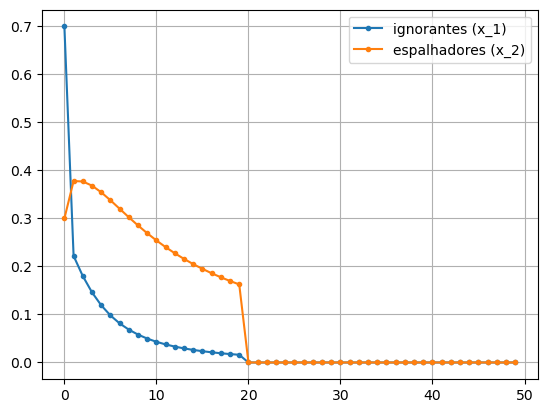

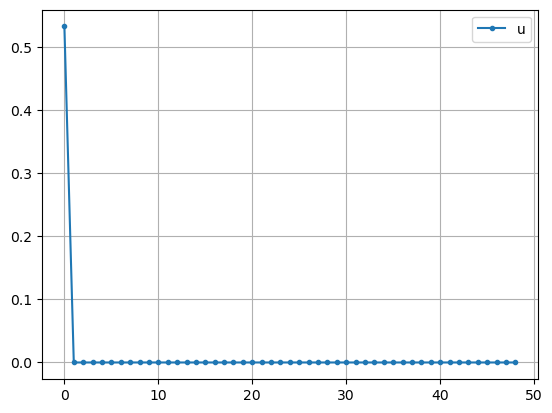

In [75]:
using PyPlot
PyPlot.svg(true)
PyPlot.plot([x1 x2],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)"], loc="best")
PyPlot.grid()
PyPlot.figure()
PyPlot.plot(uu,".-")
PyPlot.legend("u",loc="best")
PyPlot.grid()

**Tenha certeza de que seu código compila corretamente! Rodarei seu código!**

## 4. Resultados e discussão ##

Neste seção, os resultados obtidos serão exibidos e discutidos. Mostre figuras, gráficos, imagens, curvas de compromisso, e o que mais puder melhor ilustrar seus resultados. A discussão deverá explicar o que significam os resultados e como interpretá-los. As limitações da sua abordagem/modelo também devem ser colocadas, bem como uma análise da sensibilidade dos resultados em relação às hipóteses feitas.


Utilize plots (veja exemplos  `PyPlot` [aqui](https://gist.github.com/gizmaa/7214002))

Aqui está um exemplo de uma tabela (em Markdown):

| Tabelas        | São           | Boas  |
| ------------- |:-------------:| -----:|
| col 3 é      | alinhado à direita |\$1600 |
| col 2 é      | centrado      |  \$12 |
| texto | também serve      |   \$1 |

### 4.A. Subseções devem ser utilizadas para organizar seu texto.

#### 4.A.a. ou até subsubseções.

## 5. Conclusão ##

Faça um resumo do que encontrou e dos seus resultados, e fale de pelo menos uma direção na qual  seu trabalho pode ser desenvolvido no futuro, algo que poderia ser interessante em decorrência do seu projeto.
